In [1]:

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [4]:
X

array([[-0.71239066],
       [-0.43714566],
       [-0.45375238],
       [ 0.95283061],
       [ 0.23785784],
       [ 0.86121137],
       [-0.24332625],
       [ 0.18494595],
       [-0.72099967],
       [-0.42989708],
       [ 2.01522083],
       [ 0.39724133],
       [ 0.20780005],
       [-0.23242587],
       [-0.76862702],
       [ 0.45315861],
       [ 0.63988397],
       [ 0.3595323 ],
       [-1.61510796],
       [ 1.74924179],
       [-0.78898902],
       [-0.51196509],
       [-0.92833523],
       [ 2.15038297],
       [-0.2073497 ],
       [-1.63909341],
       [-0.33861825],
       [-0.32212366],
       [-0.48137142],
       [-0.52316421],
       [ 0.72196506],
       [ 0.76591105],
       [ 0.45348104],
       [-1.26160595],
       [-2.18711527],
       [-1.18541881],
       [ 0.21745166],
       [ 1.33031692],
       [-1.08718159],
       [ 0.56226171],
       [-1.51284512],
       [-0.00238903],
       [-0.27813452],
       [ 0.45181234],
       [ 1.19070527],
       [ 0

In [5]:
y

array([-3.43198806e+01, -9.42120961e+00, -1.90881877e+01,  2.04372122e+01,
        2.77559659e+01, -2.90750046e+00, -1.41987828e+01,  5.40025891e+00,
       -2.64264302e+01, -3.49067872e+01,  3.73362043e+01,  1.28532816e+01,
        2.50289888e+01, -1.89608736e+01, -2.34655852e+01,  3.77839324e+01,
        6.69670792e+00, -5.57201352e+00, -4.92158778e+01,  1.59474399e+01,
       -4.29667324e+01,  6.09015466e+00, -2.53194769e+01,  6.28216706e+01,
        1.24870400e+01, -3.27136530e+01, -1.88255476e+01, -2.93912926e+01,
       -2.86886731e+01,  4.38924069e+00,  4.63542396e+01,  2.43919519e+01,
        3.79848517e+01, -3.45767718e+01, -6.18736296e+01, -4.64421597e+01,
       -6.88808416e+00,  3.96988084e+01, -3.52373298e+01,  8.36850884e+00,
       -3.96814412e+01,  8.27318308e+00, -4.40722161e+00, -3.01350607e+00,
        5.78213629e+01,  2.46525603e+01,  1.81131707e+01, -5.22849035e+01,
        3.59187182e+01,  1.58411788e+01,  2.40080546e+01, -2.51245994e+01,
       -4.39284313e+01,  

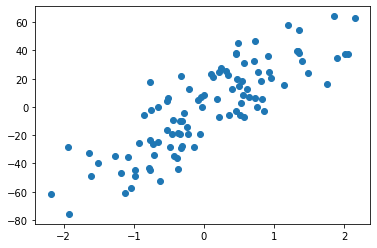

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
lr.coef_

array([28.12597332])

In [30]:
lr.intercept_

-2.2710144261783825

In [13]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661012

### MAKING LINEAR REGRESSION CLASS

In [35]:
class GDregressor:
    
    def __init__(self,learning_rate,epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 100
        self.b = -120
    
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.learning_rate * loss_slope_b)
            self.m = self.m - (self.learning_rate * loss_slope_m)
        print(self.m,self.b)
            
    def predict(self,X):
        return self.m * X + self.b      
    
        

In [36]:
gd = GDregressor(0.001,200)
gd.fit(X,y)

27.828091032520142 -2.2947445586769826


In [37]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6357827506345679